# Auto Insurance Fraud Claims 

## Problem Statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # to see all the rows
pd.set_option('display.max_columns', None) # to see all the columns

## Importing and Exploring Dataset

In [2]:
Insurance=pd.read_csv('Auto Insurance Claims.csv')
Insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
Insurance.shape

(1000, 40)

There are 1000 rows and 40 attributes

In [4]:
Insurance.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are many categorical columns in dataset.

In [5]:
Insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can't see any null values in all dataset columns except _c39 column which have all null vlaues.

In [6]:
#we will drop _c39 column as there are no values in this column.

Insurance.drop('_c39',inplace=True,axis=1)

In [7]:
#we will also drop policy_number as this is irrelevant for finding the fraud report.

Insurance.drop('policy_number',axis=1,inplace=True)

In [8]:
#we will delete policy_bind_date as it will not help in fraud report.

Insurance.drop('policy_bind_date',axis=1,inplace=True)

In [9]:
#we will check column names

Insurance.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
Insurance.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [12]:
col=Insurance.columns
col

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [13]:
for i in col:
    if Insurance[i].dtype == 'object':
        print('column name:',i,'and unique variables are ',Insurance[i].unique())


column name: policy_state and unique variables are  ['OH' 'IN' 'IL']
column name: policy_csl and unique variables are  ['250/500' '100/300' '500/1000']
column name: insured_sex and unique variables are  ['MALE' 'FEMALE']
column name: insured_education_level and unique variables are  ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
column name: insured_occupation and unique variables are  ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
column name: insured_hobbies and unique variables are  ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
column name: insured_relationship and unique variables are  ['husband' 'ot

In [14]:
#We will drop the accident location as this data will also is irrelavnt and has lot of miss values.

Insurance.drop('incident_location',axis=1,inplace=True)

In [15]:
col=Insurance.columns

In [16]:
for i in col:
    if Insurance[i].dtype == 'object':
        print('column name:',i,'and unique variables are ',Insurance[i].unique())

column name: policy_state and unique variables are  ['OH' 'IN' 'IL']
column name: policy_csl and unique variables are  ['250/500' '100/300' '500/1000']
column name: insured_sex and unique variables are  ['MALE' 'FEMALE']
column name: insured_education_level and unique variables are  ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
column name: insured_occupation and unique variables are  ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
column name: insured_hobbies and unique variables are  ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
column name: insured_relationship and unique variables are  ['husband' 'ot

##### We can see special character '?' is present in few columns which we will have to replace with mode while data cleaning.

# Exploratoy Data Analysis

### Univariate Analysis

In [17]:
Insurance.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

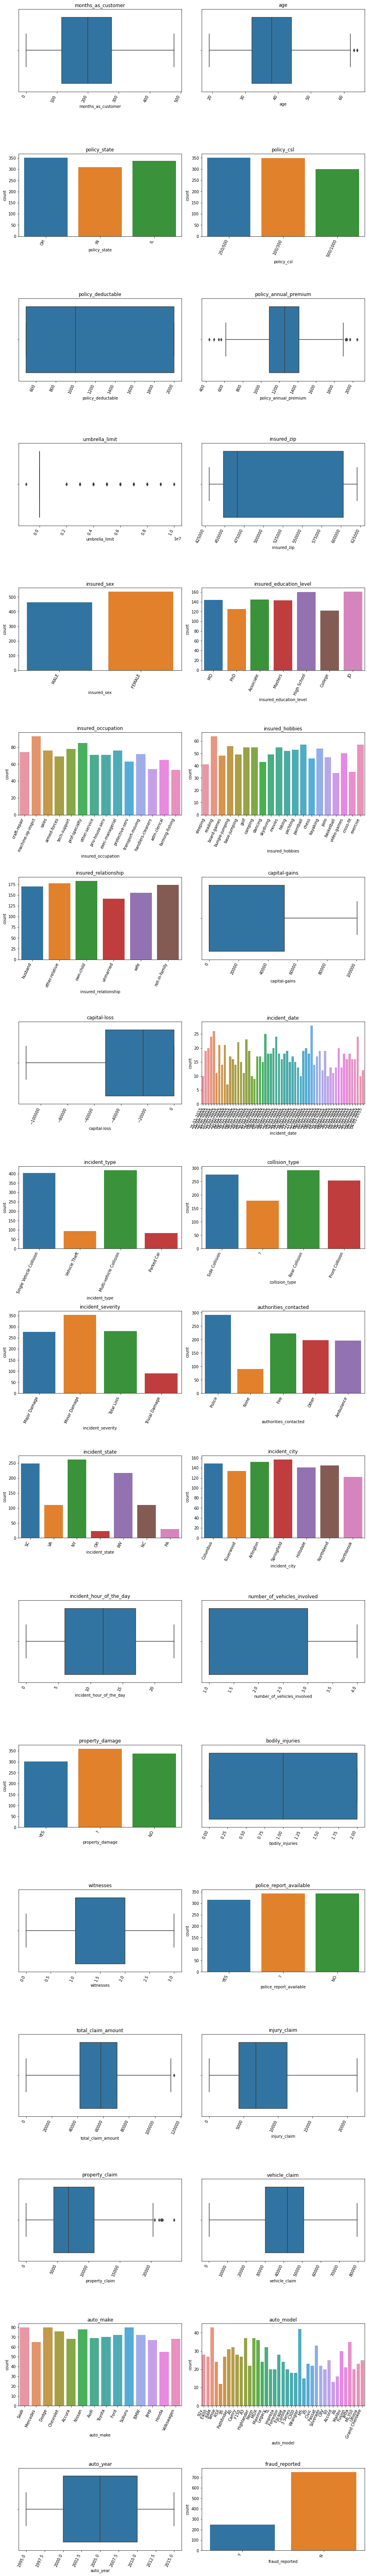

In [18]:
ncols,nrows = (20,2)
columnlist=Insurance.columns.values

plt.figure(figsize=(13,100))
for index,col in enumerate(columnlist):
    plt.subplot(ncols,nrows,index+1)
    
    if Insurance[col].dtype == 'object':
        sns.countplot(Insurance[col])
        plt.xticks(rotation=65, horizontalalignment='right')
        plt.title(col)
        
    else:
        
        sns.boxplot(Insurance[col])
        plt.xticks(rotation=65, horizontalalignment='right')
        plt.title(col)
        
        
    plt.tight_layout()
    
    
    
plt.show() 

### Observation:
    
1)Month_as_customer - There are no outliers in month_as_customer

2)Age - There are outliers present in age column.

3)Policy_State - OH is highest prefered and IN is the lowest to IL.

4)Policy_csl - 250/500 and 100/300 are in almost equal number.

5)Policy_deductable - There are no outliers in this column.

6)Policy_annual_premium - There are outliers in lower and higher range .

7)Umbrella_limit -  This is categorised column in int form.

8)Insured_zip - There are no outlierds present in this column.

9)Insure_sex - Count of females is more than males in this dataset.

10)Insure_education_level - Count of high school and JD is highest in dataset and are almost equal.Count of college pass out                               and phD is least and almost equal.Count of MD,Associate and masteres membersare almost euqal and                               higher tha phD members.

11)Insured_occupation - Insured members with Machine-op-inspct occupation are highest.Farming-fisher and handlers_cleaners
                         insured members are the least compared to all other occupations.
                         
12)Insured_hobbies - Most of the insured members are havinf reading as there hobby.Also exercise,paintball,movies,golf,camping                      bungie-jumping is common habbits among the members.Few members are having cross-fit and basketball as                          there hobby.

13)Insured-relationship - Members with own-child are majorly present in the dataset.Other common members are not-in-                                     family,husband and other-relative.Very feew are unmarried.

14)Capital-gain - There are no outliers.

15)Capital-loss - we cannot observre any outliers in this column.

16)Incident-type - Single vehicle collision and multiple vehicle collision are the highest incidents occuring.
                   Parked vehicle and theft are least incident occuring.
                   
17)Collision Type - Rear collision is most occuring collison and next to it is side collision.Front collision is next to side                       collisoin in count.There are some blank data in this column.

18)Incident_severity - Incident severity is mostly minor damage is this dataset.Total loss and major damage are almost in equal                        numbers and next to the count of minor damage.Ver few have trival damage.

19)Authorities_contacted - Members mostly contact police after and incident ,next to ploice members prefer contacting                                      fire.Ambulance and other authorities are contacted almost by equal members .Very few members prefer                            not contacting anyone.

20)Incident_state - Most of the incidents happening states are  NY and SC.Very few incidents happen in OH and PA.

21)Incident_city - Incident majorly occur in springfield.Almost equal count of incidents occur in airligton,columus and                            northbend.Few incident also occur in northbook.

22)Incident_hour_of_the_day - No outliers present.

23)Number_of_vehicles_involved - No ouliers present and max 4 vehicleare present in the incident.

24)Property_damage - we majorly have blank columns in this dataset as '?'.Propert damage are the least cases .

25)Witness - There are usually 1 or 2 witneses with members.

26)Police_report_available - Incidents with no reports available and blanks are in equal count.Few incidents have ploice report 
                             available.
                             
27)Total_claim_amount - There are few outliers present in total_claim_amount.

28)Property_claim - Outliers are present in this column.

29)Auto_make - Saab,Nissan,Dodge and suburu are most common vehicles involved in incident.Honda and Mercedes vehicles are                      involved in very less numbers compared to other vehicls makes.

30)Auto_model - Tahoe and M5 are most common models involved in incident.95 and accord are the least models involved.

31)Auto_year - Auto years are ranging in year of 1995 to 2015.

32)Fraud_reported - Dataset have very few fraud cases.

### Bivariate Analysis

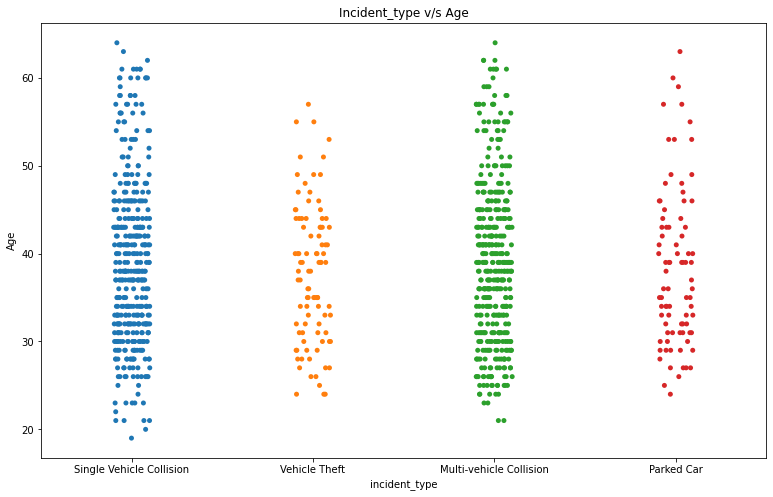

In [19]:
plt.figure(figsize=(13,8))
ax=sns.stripplot(Insurance['incident_type'],Insurance['age'])
ax.set(xlabel='incident_type',ylabel='Age')
plt.title('Incident_type v/s Age')
plt.show()

Observation:
    
Collisoin is most commom incident type and age bar is both least and high in this case.

Vehicle theft is reported by members ranging there age from 25 to less than 60.

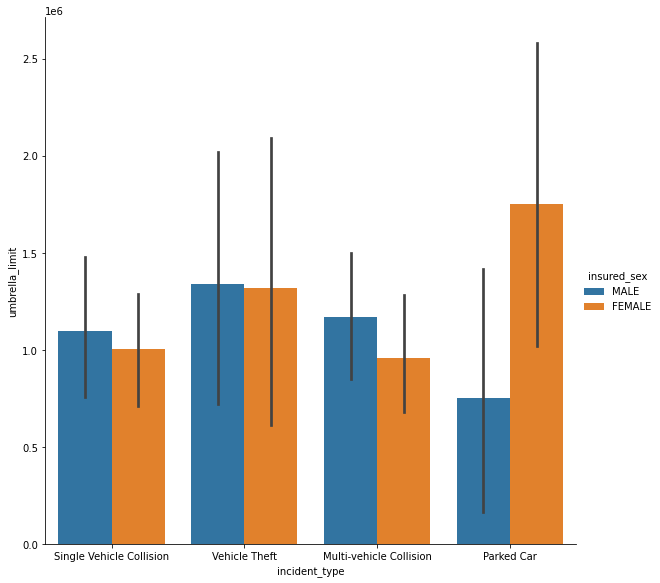

In [20]:
sns.catplot(x='incident_type',y='umbrella_limit',hue='insured_sex',data=Insurance,kind='bar',size=8)
plt.show()

Observation:
    
Umbrella limit of policy is highest of males in all incident types except parked car incident.

Umbrella limit of policy is highest of females in parked car incidents type.

Single or multiple vehicle collison have similar umbrella limit for both males and females.

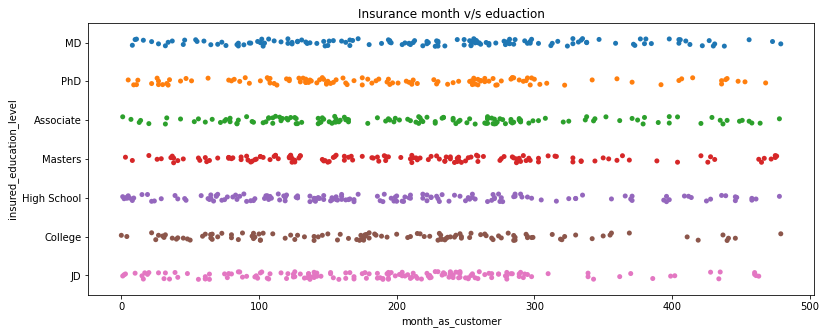

In [21]:
plt.figure(figsize=(13,5))
ax=sns.stripplot(Insurance['months_as_customer'],Insurance['insured_education_level'])
ax.set(ylabel='insured_education_level',xlabel='month_as_customer')
plt.title('Insurance month v/s eduaction')
plt.show()

Observation:
    
Members with MD,Associate and maters qualification have spent most of their month as customer .

JD and PhD qualified are very few members.
    

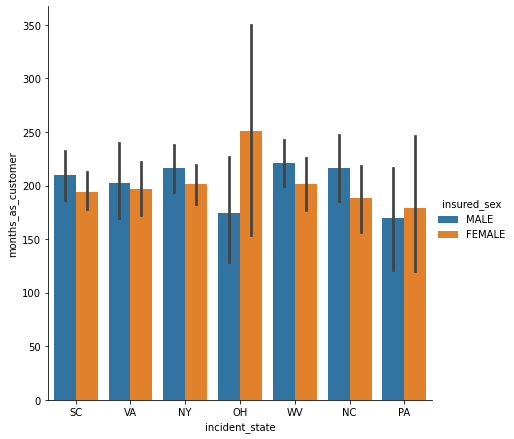

In [22]:
sns.catplot(y='months_as_customer',x='incident_state',hue='insured_sex',data=Insurance,kind='bar',size=6)
plt.show()

Observation:
    
Females have spent more month as customer in OH compared to males and any gender in any state.

Male customers have spent more months compared to females in all states.

<Figure size 576x576 with 0 Axes>

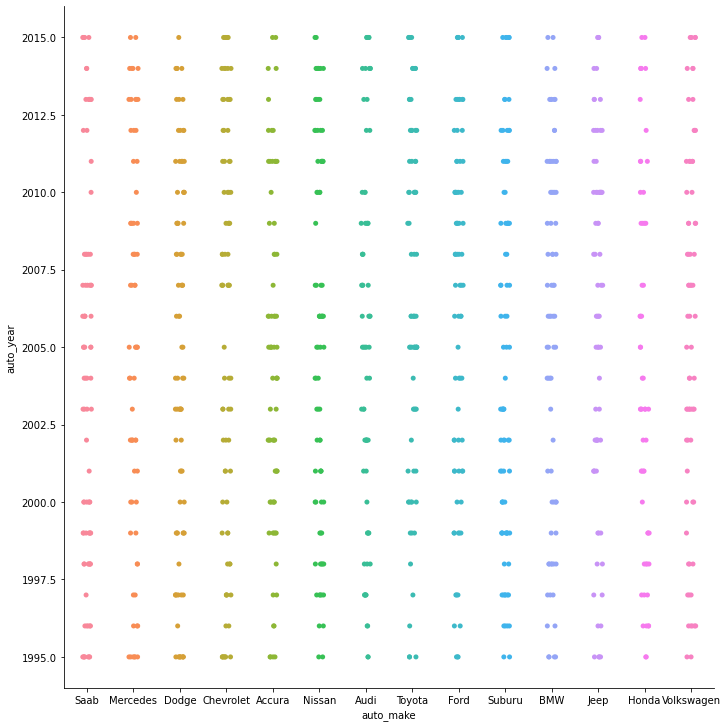

In [23]:
plt.figure(figsize=(8,8))
sns.catplot(x='auto_make',y='auto_year',data=Insurance,size=10)
plt.show()

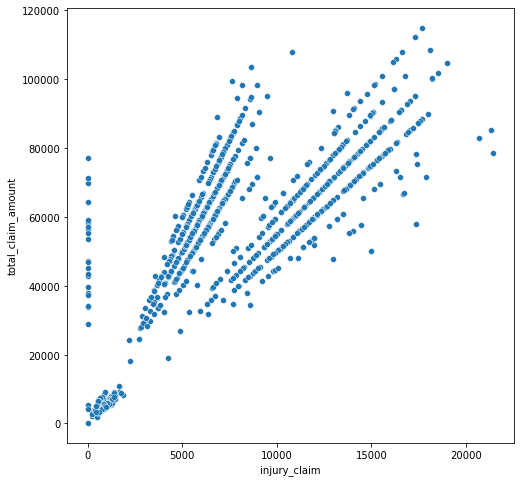

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='injury_claim',y='total_claim_amount',data=Insurance)
plt.show()

Observation:
    
Total claim amount and injury claim is positively correlated with each other    

<Figure size 1080x720 with 0 Axes>

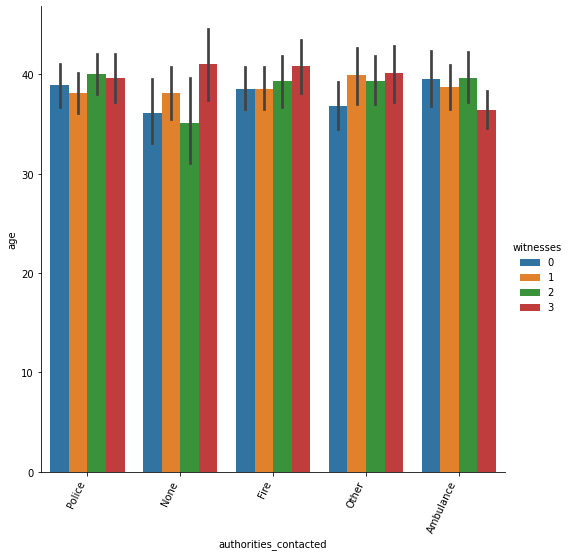

In [25]:
plt.figure(figsize=(15,10))
chart=sns.catplot(x='authorities_contacted',y='age',hue='witnesses',data=Insurance,kind='bar',size=7)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Observsation:
    
There are mostly 3 witnesses when no authorities,fire or other authorities were contactes.

There were mostly 2 witnesses when police and ambulance were contacted.

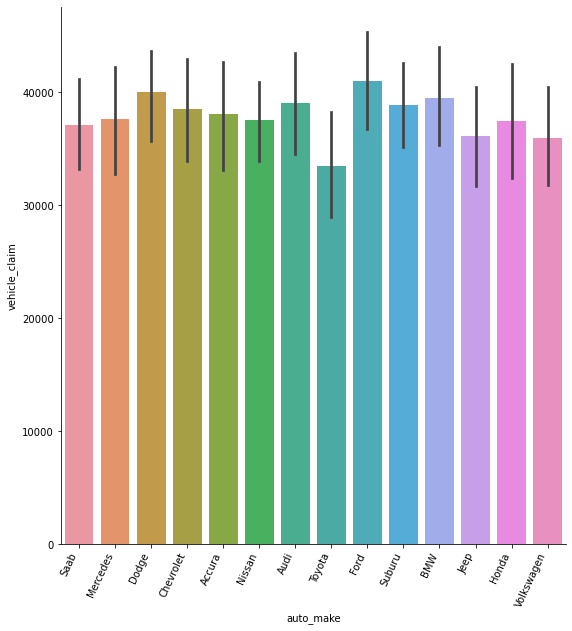

In [26]:
sns.catplot(y='vehicle_claim',x='auto_make',data=Insurance,kind='bar',size=8)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Observation:
    
Ford vehicles have claimed the highest amount compared to other maked.

Toyota vehicles get least vehicle claim compared to other make auto models.



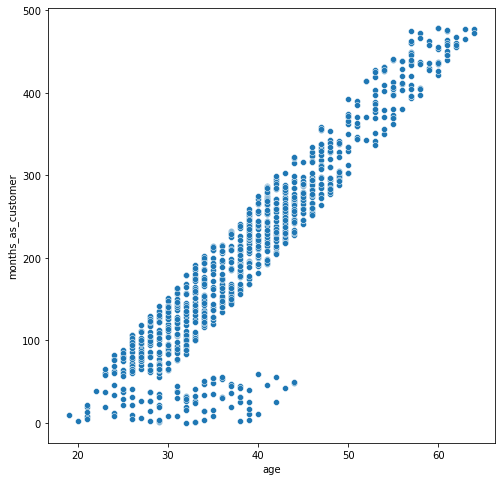

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='age',y='months_as_customer',data=Insurance)
plt.show()

Observation:
    
Age of customer and months as customer is highly positively correlated.    

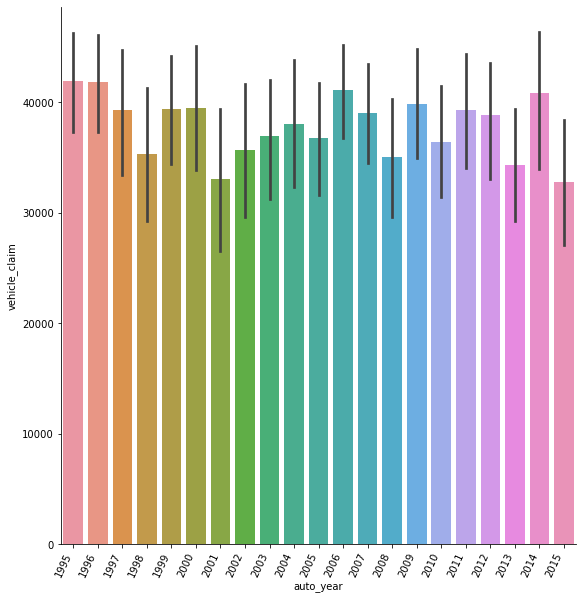

In [28]:
sns.catplot(y='vehicle_claim',x='auto_year',data=Insurance,kind='bar',size=8)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Observation:
    
Vehicles of 1995,1996,2006 and 2014 have highest vehicle claim amount.

Vehicles of 2001,1998,2015 and 2013 have been claimed very lesss amount.


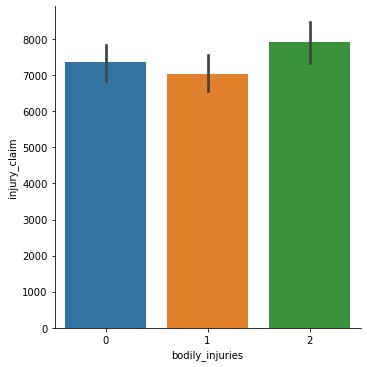

In [29]:
sns.catplot(y='injury_claim',x='bodily_injuries',data=Insurance,kind='bar')
plt.show()

Observation:
    
Injuriy claim is high for 2 bodily injuries and least of all for 1 bodily_injuries.    

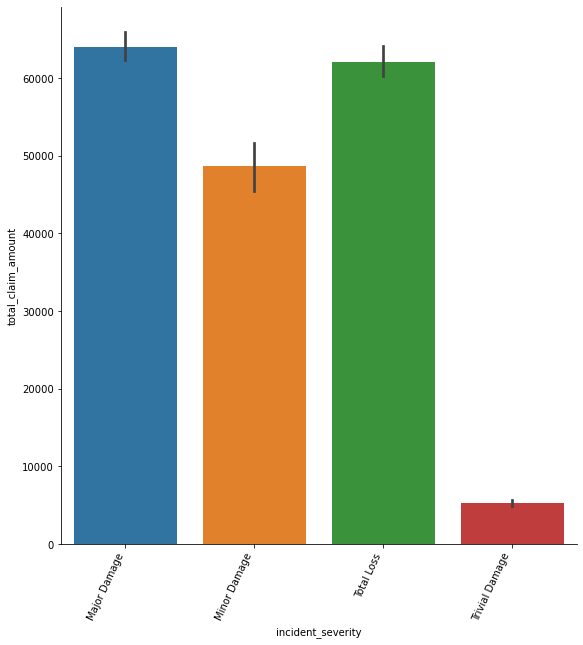

In [30]:
sns.catplot(y='total_claim_amount',x='incident_severity',data=Insurance,kind='bar',size=8)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

Observation:
    
Total_claim_amount is highest and almost same for major damage and total loss of vehicle.Total claim amount is least in trival damage .    

### Multivariate Analysis

In [ ]:
sns.pairplot(Insurance)

## Treating Missing Values

In [32]:
col=Insurance.columns

In [33]:
for i in col:
    if Insurance[i].dtype == 'object':
        print('column name:',i,'and unique variables are ',Insurance[i].unique())

column name: policy_state and unique variables are  ['OH' 'IN' 'IL']
column name: policy_csl and unique variables are  ['250/500' '100/300' '500/1000']
column name: insured_sex and unique variables are  ['MALE' 'FEMALE']
column name: insured_education_level and unique variables are  ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
column name: insured_occupation and unique variables are  ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
column name: insured_hobbies and unique variables are  ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
column name: insured_relationship and unique variables are  ['husband' 'ot

In [34]:
for i in col:
    if Insurance[i].dtype == 'object':
        print('column name:',i,'and unique variables are \n ',Insurance[i].value_counts(),'\n')

column name: policy_state and unique variables are 
  OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

column name: policy_csl and unique variables are 
  250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

column name: insured_sex and unique variables are 
  FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

column name: insured_education_level and unique variables are 
  JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

column name: insured_occupation and unique variables are 
  machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing  

#### We can see special character in columns collision_type,property_damage and police_report.We will replace this ? with mode value from the column.



In [35]:
Insurance['collision_type'].replace('?','Rear Collision',inplace=True)

In [36]:
Insurance['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [37]:
Insurance['property_damage'].replace('?','NO',inplace=True)

In [38]:
Insurance['police_report_available'].replace('?','NO',inplace=True)

In [39]:
for i in col:
    if Insurance[i].dtype == 'object':
        print('column name:',i,'and unique variables are \n ',Insurance[i].value_counts(),'\n')

column name: policy_state and unique variables are 
  OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

column name: policy_csl and unique variables are 
  250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

column name: insured_sex and unique variables are 
  FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

column name: insured_education_level and unique variables are 
  JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

column name: insured_occupation and unique variables are 
  machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing  

#### Customer who will make fraud will not correlate the incident date ,hence  we can say there is no relation between incident date and label column.We will drop the column incident_date.

In [40]:
Insurance.drop('incident_date',inplace=True,axis=1)

We will drop policy_state as fraud customer has nothing to do from which state hw/she is.

We will drop insured_zip as this will also not help us in predicitng the case is fraud or not.

We will drop insured hobbies as this is also irrelevant  .

We will drop incident city as this also not helpfull for prediction.

In [41]:
Insurance.drop('policy_state',inplace=True,axis=1)

In [42]:
Insurance.drop('insured_zip',inplace=True,axis=1)

In [43]:
Insurance.drop('insured_hobbies',inplace=True,axis=1)

In [44]:
Insurance.drop('incident_city',inplace=True,axis=1)

#### We will check the dataset again now after replacing special character deleting unwanted columns.

In [45]:
Insurance.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Correlation

In [46]:
Insurance.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527


#### Check heat map for better undersatnding of correlation.

<AxesSubplot:>

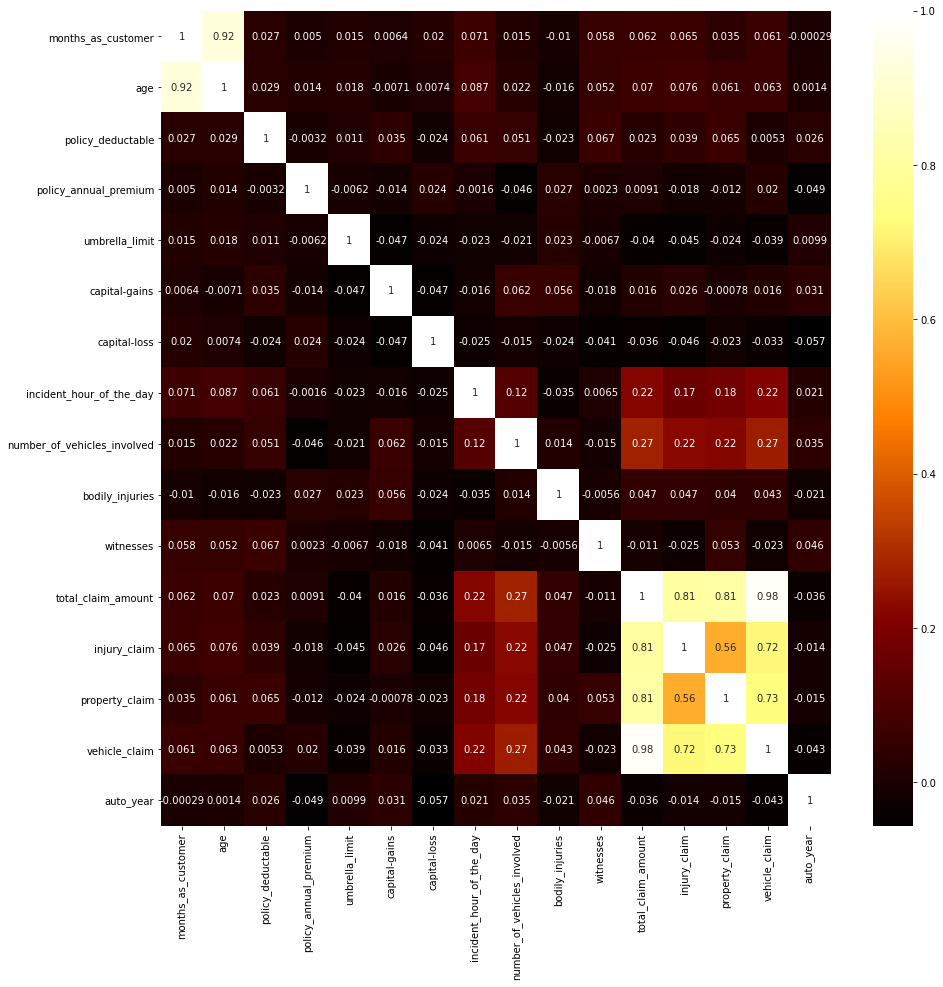

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(Insurance.corr(),annot=True,cmap='afmhot')

#### Observatiosn:
    
We can see vehilce_claim and total_claim_amount are most highly correlated columns in the dataset.

Age and month_as_customer are also highly correlated columns.

Total_claim_amount and property_claim is hihgly correlated.

Total_claim_amount and injury_claim is highly correlated.

##### We will drop total_claim_amount column and age as they are highlt correlated columns to other columns

In [48]:
Insurance.drop('total_claim_amount',inplace=True,axis=1)

In [49]:
Insurance.drop('age',inplace=True,axis=1)

## Outliers

In [50]:
Insurance.describe()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [51]:
CN=['policy_annual_premium','property_claim']

CN

['policy_annual_premium', 'property_claim']

In [52]:
ncols,nrows = (3,1)

#### Box plot for outliers

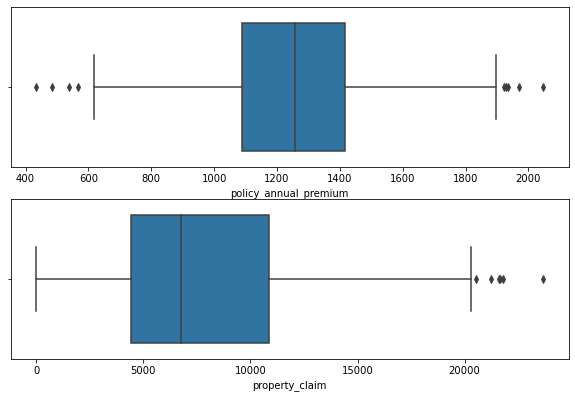

In [53]:
plt.figure(figsize=(10,10))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.boxplot(Insurance[CN[index]])

### Quantile

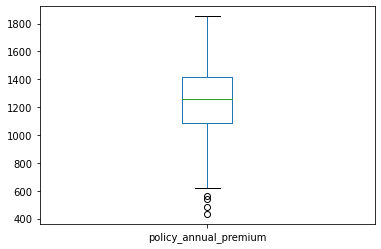

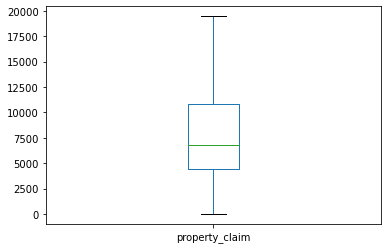

In [54]:
for i in CN:
    
    q4=Insurance[i].quantile(0.99)
    Insurance[i][Insurance[i]>q4]=q4
    Insurance[i].plot.box()
    plt.show()

##### We can outliers are removed from mentioned columns

## Encoding

In [55]:
Insurance.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,5,1,YES,1,2,YES,6510,13020.0,52080,Saab,92x,2004,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,8,1,NO,0,0,NO,780,780.0,3510,Mercedes,E400,2007,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,7,3,NO,2,3,NO,7700,3850.0,23100,Dodge,RAM,2007,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,5,1,NO,1,2,NO,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,20,1,NO,0,1,NO,1300,650.0,4550,Accura,RSX,2009,N


In [56]:
LOHC=[ 'policy_csl', 'insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','property_damage','police_report_available']
LOHC

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'property_damage',
 'police_report_available']

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [59]:
for i in LOHC:
    Insurance=pd.get_dummies(data=Insurance, columns=[i])

In [60]:
Insurance.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020.0,52080,Saab,92x,2004,Y,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780.0,3510,Mercedes,E400,2007,Y,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850.0,23100,Dodge,RAM,2007,N,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650.0,4550,Accura,RSX,2009,N,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [61]:
Insurance.shape

(1000, 76)

In [62]:
LLE=['auto_make','auto_model','fraud_reported']
LLE

['auto_make', 'auto_model', 'fraud_reported']

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
LE=LabelEncoder()

In [65]:
for i in LLE:
    Insurance[i]=LE.fit_transform(Insurance[i].values.reshape(-1,1))

In [66]:
Insurance.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020.0,52080,10,1,2004,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780.0,3510,8,12,2007,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850.0,23100,4,30,2007,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340.0,50720,3,34,2014,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650.0,4550,0,31,2009,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


## Data Spliting

In [67]:
x=Insurance.drop('fraud_reported',axis=1)
y=Insurance.iloc[:,16:17]

In [68]:
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020.0,52080,10,1,2004,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780.0,3510,8,12,2007,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850.0,23100,4,30,2007,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340.0,50720,3,34,2014,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650.0,4550,0,31,2009,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [69]:
y.head()

,fraud_reported
0,1
1,1
2,0
3,1
4,0


In [70]:
y.value_counts()

fraud_reported
0                 753
1                 247
dtype: int64

## Correcting Imbalancing

In [71]:
import imblearn

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [74]:
y_over.value_counts()

fraud_reported
1                 753
0                 753
dtype: int64

In [75]:
x_over.shape

(1506, 75)

In [76]:
y_over.shape

(1506, 1)

## Skewness

In [77]:
x_over.skew()

months_as_customer                        0.347461
policy_deductable                         0.469059
policy_annual_premium                    -0.049847
umbrella_limit                            1.751801
capital-gains                             0.536801
capital-loss                             -0.356824
incident_hour_of_the_day                 -0.049567
number_of_vehicles_involved               0.619690
bodily_injuries                           0.232171
witnesses                                 0.110155
injury_claim                              0.213517
property_claim                            0.296324
vehicle_claim                            -0.801317
auto_make                                 0.074354
auto_model                               -0.022281
auto_year                                -0.002970
policy_csl_100/300                        1.047145
policy_csl_250/500                        1.013110
policy_csl_500/1000                       1.387839
insured_sex_FEMALE             

##### We will have to correct the skewness only of vehicle_claim,all other columns skewness is within limit of -0.5 to 0.5.

We tried removing skewness with sqrt and log method ,skewness increased.We will ise power transform method.

In [78]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=True) 
X_power=pt.fit_transform(x_over.iloc[:,12:13])
x_over.iloc[:,12:13]=pd.DataFrame(X_power,columns=x_over.iloc[:,12:13].columns)
x_over.iloc[:,12:13].skew()

vehicle_claim   -0.443103
dtype: float64

##### Skewness of all the three columns is within the limit of -0.5 to 0.5

## Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)

In [81]:
x_over.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,0.684760,0.333333,0.686322,0.090909,0.530348,1.000000,0.217391,0.000000,0.5,0.666667,0.303497,0.668659,0.584546,0.769231,0.026316,0.45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.475992,1.000000,0.538502,0.545455,0.000000,1.000000,0.347826,0.000000,0.0,0.000000,0.036364,0.040058,0.019052,0.615385,0.315789,0.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.279749,1.000000,0.690714,0.545455,0.349254,1.000000,0.304348,0.666667,1.0,1.000000,0.358974,0.197722,0.208618,0.307692,0.789474,0.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.534447,1.000000,0.692547,0.636364,0.486567,0.438344,0.217391,0.000000,0.5,0.666667,0.295571,0.325599,0.565270,0.230769,0.894737,0.95,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.475992,0.333333,0.811098,0.636364,0.656716,0.585959,0.869565,0.000000,0.0,0.333333,0.060606,0.033382,0.026519,0.000000,0.815789,0.70,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### Data is ready for model execution after treating the missing values,encoding,removing skewness and scaling

## Model Execution

#Best random_state for model execution.
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    ac=accuracy_score(y_test,pred)
    
    if ac>maxAccu:
        maxAccu=ac
        maxRS=i
        
print('Best Accuracy score is',maxAccu*100,'at random state',maxRS)

We will consider random_state 8 for all the models 

## Logistic Regression

In [82]:
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=8)

In [83]:
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 89.60176991150442


confusion matrix 
 [[232  17]
 [ 30 173]]


classification report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       249
           1       0.91      0.85      0.88       203

    accuracy                           0.90       452
   macro avg       0.90      0.89      0.89       452
weighted avg       0.90      0.90      0.90       452



cross validation score
cross val score [0.60596026 0.77408638 0.92026578 0.95016611 0.94352159]
cross val score mean: 83.88000264020594


Difference between accuracy score and cross val mean score : 0.057217672712984835




### Hyper parameter tunning using GridSearchCV for Logistic Regression

In [84]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty': ['l2'],'tol':[0.0001,0.001,0.01],'multi_class' : ['auto', 'ovr', 'multinomial']}

grid_search_LG=GridSearchCV(estimator=LG,param_grid=params,cv=7,n_jobs=-1,verbose=1)

grid_search_LG.fit(x_train,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2'], 'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [85]:
Best_LG=grid_search_LG.best_estimator_
Best_LG

LogisticRegression()

In [86]:
grid_search_LG.best_score_

0.8434689372437718

In [87]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [88]:
evaluate_model(Best_LG)

Train Accuracy : 0.8757115749525617
Train Confusion Matrix:
[[456  48]
 [ 83 467]]
--------------------------------------------------
Test Accuracy : 0.8960176991150443
Test Confusion Matrix:
[[232  17]
 [ 30 173]]


In [89]:
    grid_search_LG.score(x_train,y_train)
    predl=grid_search_LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,predl)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predl))
    print('\n')
    print('classification report\n',classification_report(y_test,predl))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_LG,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predl)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 89.60176991150442


confusion matrix 
 [[232  17]
 [ 30 173]]


classification report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       249
           1       0.91      0.85      0.88       203

    accuracy                           0.90       452
   macro avg       0.90      0.89      0.89       452
weighted avg       0.90      0.90      0.90       452



cross validation score
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
Fitting 7 folds for each of 9 candidates, totalling 63 fits
cross val score [0.625      0.6372093  0.8744186  0.93488372 0.91627907 0.97209302
 0.9348

Difference between accuracy score and cross val mean score : 0.10650906697692997 at CF:3.
        
Difference between accuracy score and cross val mean score : 0.057217672712984835 at CF:5.
        
Difference between accuracy score and cross val mean score : 0.05391114072941616 at CF:7.       

#### AUC ROC CURVE FOR LOGISTIC REGRESSION

In [90]:
from sklearn.metrics import plot_roc_curve

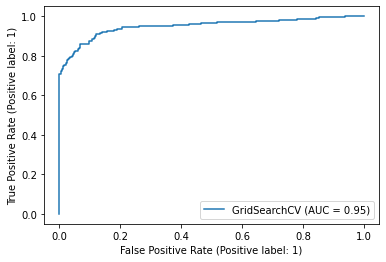

In [91]:
plot_roc_curve(grid_search_LG,x_test, y_test)
plt.show()

In [92]:
auc_score_LG=roc_auc_score(y_test,predl)
auc_score_LG*100

89.19718281994975

##### Logistic Regression after hyper tunning is giving us the best performance of 84.21% and at cross fold = 7 we are getting least difference of  0.05391 between best score and croos val mean score

## ADA BOOST CLASSIFIER

In [93]:
ad=AdaBoostClassifier(n_estimators=75)

In [94]:
    ad.fit(x_train,y_train)
    ad.score(x_train,y_train)
    pred_y=ad.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,pred_y))
    print('confusion matrix \n',confusion_matrix(y_test,pred_y))
    print('classification report \n',classification_report(y_test,pred_y))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ad,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred_y)-(score.mean())))
    print('\n')

The model is: AdaBoostClassifier(n_estimators=75)
Accuracy score: 0.8584070796460177
confusion matrix 
 [[216  33]
 [ 31 172]]
classification report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       249
           1       0.84      0.85      0.84       203

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



cross validation score
cross val score [0.65231788 0.75747508 0.91362126 0.94019934 0.92358804]
cross val score mean: 0.8374403203449869
Best score: 0.020966759301030757




### HYPER PARAMETER TUNNING FOR ADA BOOST CLASSIFIER

In [95]:
paramss = {
     
    'learning_rate': [0.5,0.8,0.9],
    'n_estimators': [50,100,150,200]
}


ada_HT = GridSearchCV(
                           estimator=ad,
                           param_grid=paramss,
                           cv = 5,
                           )

ada_HT.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=75),
             param_grid={'learning_rate': [0.5, 0.8, 0.9],
                         'n_estimators': [50, 100, 150, 200]})

In [96]:
ada_HT.best_estimator_

AdaBoostClassifier(learning_rate=0.5)

In [97]:
ad_best=ada_HT.best_estimator_
ad_best

AdaBoostClassifier(learning_rate=0.5)

In [98]:
evaluate_model(ad_best)

Train Accuracy : 0.8586337760910816
Train Confusion Matrix:
[[434  70]
 [ 79 471]]
--------------------------------------------------
Test Accuracy : 0.8915929203539823
Test Confusion Matrix:
[[225  24]
 [ 25 178]]


In [99]:
    ada_HT.score(x_train,y_train)
    preda=ada_HT.predict(x_test)
    print('The model is:',ad)
    print('Accuracy score:',accuracy_score(y_test,preda)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,preda))
    print('\n')
    print('classification report\n',classification_report(y_test,preda))
    print('\n')
    print('cross validation score')
    score=cross_val_score(ada_HT,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,preda)-(score.mean())))
    print('\n')
    

The model is: AdaBoostClassifier(n_estimators=75)
Accuracy score: 89.15929203539822


confusion matrix 
 [[225  24]
 [ 25 178]]


classification report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       249
           1       0.88      0.88      0.88       203

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



cross validation score
cross val score [0.63245033 0.77740864 0.91694352 0.93023256 0.93355482]
cross val score mean: 83.81179732019098


Difference between accuracy score and cross val mean score : 0.05347494715207257




Difference between accuracy score and cross val mean score : 0.1073963732092279 at CF:3.
        
Difference between accuracy score and cross val mean score : 0.05413499863608828 at CV:5.        

### AUC ROC CURVE FOR AdaBoostClassifer

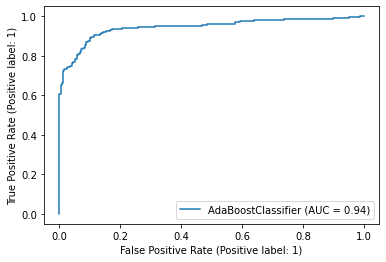

In [100]:
plot_roc_curve(ad_best,x_test, y_test)
plt.show()

In [101]:
auc_score_ad=roc_auc_score(y_test,preda)
auc_score_ad

0.8902308742358597

#### Ada Boost Classifier model after hyper tunning is giving us the best performance of 83.74% and at cross fold = 5 we are getting least difference of 0.0541 between best score and croos val mean score

## KNNeighbors Classifier

In [102]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [103]:
    KNN.fit(x_train,y_train)
    KNN.score(x_train,y_train)
    predk=KNN.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predk)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predk))
    print('\n')
    print('classification report\n',classification_report(y_test,predk))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNN,x_over,y_over,cv=3)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predk)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 84.7345132743363


confusion matrix 
 [[197  52]
 [ 17 186]]


classification report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       249
           1       0.78      0.92      0.84       203

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.86      0.85      0.85       452



cross validation score
cross val score [0.73306773 0.87649402 0.89243028]
cross val score mean: 83.39973439575033


Difference between accuracy score and cross val mean score : 0.013347788785859516




### Hyper parameter tunning using GridSearchCV for KNNeighbors Classifier

In [104]:
params = { 'weights':['distance','uniform'], 'algorithm':['ball_tree','kd_tree'], 'leaf_size':[30,60], 'p':[3,2,4,5]}

KNC=GridSearchCV(estimator=KNN,param_grid=params,cv=7,n_jobs=-1)

KNC.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [30, 60], 'p': [3, 2, 4, 5],
                         'weights': ['distance', 'uniform']})

In [105]:
KN=KNC.best_estimator_
KN

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

In [106]:
KNC.best_score_

0.8139955849889624

In [107]:
evaluate_model(KN)

Train Accuracy : 0.969639468690702
Train Confusion Matrix:
[[504   0]
 [ 32 518]]
--------------------------------------------------
Test Accuracy : 0.8473451327433629
Test Confusion Matrix:
[[197  52]
 [ 17 186]]


In [108]:
%%time
    KNC.score(x_train,y_train)
    predn=KNC.predict(x_test)
    print('The model is:',KNN)
    print('Accuracy score:',accuracy_score(y_test,predn)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predn))
    print('\n')
    print('classification report\n',classification_report(y_test,predn))
    print('\n')
    print('cross validation score')
    score=cross_val_score(KNC,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predn)-(score.mean())))
    print('\n')

The model is: KNeighborsClassifier(n_neighbors=2)
Accuracy score: 84.7345132743363


confusion matrix 
 [[197  52]
 [ 17 186]]


classification report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       249
           1       0.78      0.92      0.84       203

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.86      0.85      0.85       452



cross validation score
cross val score [0.74074074 0.66046512 0.85116279 0.87906977 0.89302326 0.91162791
 0.91627907]
cross val score mean: 83.60526639596408


Difference between accuracy score and cross val mean score : 0.011292468783722143


Wall time: 2min 10s


Difference between accuracy score and cross val mean score : 0.012180305816065884 at CF:5
        
Difference between accuracy score and cross val mean score : -0.0010953056075508893 at CF:7        

### AUC ROC CURVE FOR KNeighbors Classifier

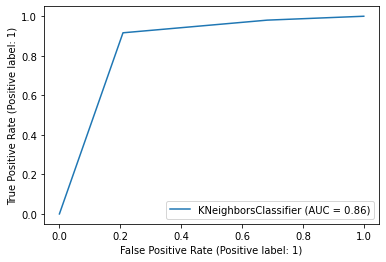

In [109]:
plot_roc_curve(KN,x_test, y_test)
plt.show()

In [110]:
auc_score_KN=roc_auc_score(y_test,predn)
auc_score_KN*100

85.37104081350031

#### KNeighbors Classifier after hyper tunning is giving us the best performance of 83.73% and at cross fold = 7 we are getting least difference of -0.001 between best score and croos val mean score

## Random Forest Classifier

In [111]:
rf=RandomForestClassifier(n_estimators=150)

In [112]:
    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('classification report \n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 0.9048672566371682
confusion matrix 
 [[228  21]
 [ 22 181]]
classification report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       249
           1       0.90      0.89      0.89       203

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



cross validation score
cross val score [0.69536424 0.81063123 0.9269103  0.9269103  0.94019934]
cross val score mean: 0.8600030802402587
Best score: 0.04486417639690943




### HYPER PARAMETER TUNNING FOR RANDOM FOREST CLASSIFIER

In [113]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10,20,30,50,100,150]
}


grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [10, 20, 30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [114]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30)

In [115]:
rf_best=grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30)

In [116]:
grid_search_rf.best_score_

0.8576799819453846

In [117]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [118]:
evaluate_model(rf_best)

Train Accuracy : 0.9022770398481973
Train Confusion Matrix:
[[460  44]
 [ 59 491]]
--------------------------------------------------
Test Accuracy : 0.8938053097345132
Test Confusion Matrix:
[[223  26]
 [ 22 181]]


In [119]:
%%time    
    grid_search_rf.score(x_train,y_train)
    predr=grid_search_rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,predr)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predr))
    print('\n')
    print('classification report\n',classification_report(y_test,predr))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_rf,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predr)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier(n_estimators=150)
Accuracy score: 89.38053097345133


confusion matrix 
 [[223  26]
 [ 22 181]]


classification report
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       249
           1       0.87      0.89      0.88       203

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



cross validation score
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
cross val score [0.70833333 0.6744186  0.86976744 0.9302

Difference between accuracy score and cross val mean score : 0.10008931824325107 at CF:3
        
Difference between accuracy score and cross val mean score : 0.048860702498282116 at CF:7        

### AUC ROC CURVE FOR RF

In [120]:
from sklearn.metrics import plot_roc_curve

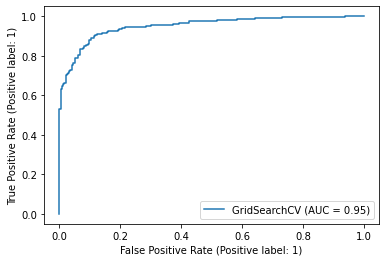

In [121]:
plot_roc_curve(grid_search_rf,x_test, y_test)
plt.show()

In [122]:
auc_score=roc_auc_score(y_test,pred)
auc_score

0.9036441331829782

#### Random Forest Classifier after hyper tunning is giving us the best performance of 84.93% and at cross fold = 7 we are getting least difference of 0.048 between best score and croos val mean score

## DecissionTree Classifier

In [123]:
    DTC=DecisionTreeClassifier(random_state=83)
    DTC.fit(x_train,y_train)
    DTC.score(x_train,y_train)
    pred=DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(DTC,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean()))*100)
    print('\n')

The model is: DecisionTreeClassifier(random_state=83)
Accuracy score: 80.97345132743364


confusion matrix 
 [[200  49]
 [ 37 166]]


classification report
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       249
           1       0.77      0.82      0.79       203

    accuracy                           0.81       452
   macro avg       0.81      0.81      0.81       452
weighted avg       0.81      0.81      0.81       452



cross validation score
cross val score [0.695 0.725 0.69  0.725 0.73 ]
cross val score mean: 71.3


Difference between accuracy score and cross val mean score : 9.673451327433636




### Hyper parameter tunning using GridSearchCV for Decision Tree Classifier

In [124]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100]}

grid_search_DTC=GridSearchCV(estimator=DTC,param_grid=params,cv=7,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search_DTC.fit(x_train,y_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=83), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [125]:
Best_dtc=grid_search_DTC.best_estimator_
Best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=83)

In [126]:
grid_search_DTC.best_score_

0.8481614632608009

In [127]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))

In [128]:
evaluate_model(Best_dtc)

Train Accuracy : 0.8481973434535104
Train Confusion Matrix:
[[423  81]
 [ 79 471]]
--------------------------------------------------
Test Accuracy : 0.8871681415929203
Test Confusion Matrix:
[[221  28]
 [ 23 180]]


In [129]:
    grid_search_DTC.score(x_train,y_train)
    predt=grid_search_DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,predt)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,predt))
    print('\n')
    print('classification report\n',classification_report(y_test,predt))
    print('\n')
    print('cross validation score')
    score=cross_val_score(grid_search_DTC,x_over,y_over,cv=7)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,predt)-(score.mean())))
    print('\n')

The model is: DecisionTreeClassifier(random_state=83)
Accuracy score: 88.71681415929203


confusion matrix 
 [[221  28]
 [ 23 180]]


classification report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       249
           1       0.87      0.89      0.88       203

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



cross validation score
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
Fitting 7 folds for each of 50 candidates, totalling 350 fits
cross val score [0.76388889 0.74418605 0.86976744 0.91162

Difference between accuracy score and cross val mean score : 0.07153979950404865 at CF:3.
        
Difference between accuracy score and cross val mean score : 0.03296427509743005 at CF:7        

### AUC ROC CURVE FOR DTC

In [130]:
from sklearn.metrics import plot_roc_curve

<Figure size 1080x1080 with 0 Axes>

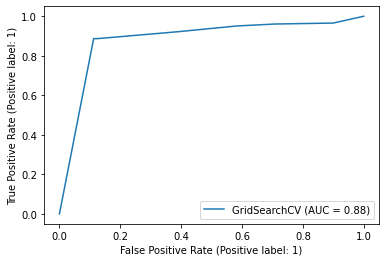

In [131]:
plt.figure(figsize=(15,15))
plot_roc_curve(grid_search_DTC,x_test, y_test)
plt.show()

In [132]:
auc_score=roc_auc_score(y_test,grid_search_DTC.predict(x_test))

In [133]:
auc_score*100

88.71248540961876

## Conclusion:

After running all the models we could understand random forest classifier is best performing model with accuracy score 84.93% at 7 cross folds,also confusion matrix and classification report are justiying the better score .

#### confusion matrix 

 [[223  26]

  [ 22 181]]



#### classification report

                precision    recall  f1-score   support

           0       0.91      0.90      0.90       249
           1       0.87      0.89      0.88       203


## Joblib

In [161]:
joblib.dump(grid_search_rf,'Insurance.obj')

['Insurance.obj']